# Correlação da Carteira

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

### Carteira de ações

In [2]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'FLRY3.SA','PSSA3.SA', 'TIET4.SA', 'LEVE3.SA', 'WHRL3.SA']
# tickers = ['NOBL', 'IAU', 'QQQ', 'XSD']
# tickers = ['AMZN', 'M', 'LB']

### Calculando a variação diária de cada ação da carteira

In [3]:
prices = pd.DataFrame()

for b in tickers:
    prices[b] = prices[b] = web.DataReader(b, ds_yahoo, start, end)['Adj Close']

log_returns = np.log(prices / prices.shift(1))
correlacao = log_returns.corr()

### Mapa de calor

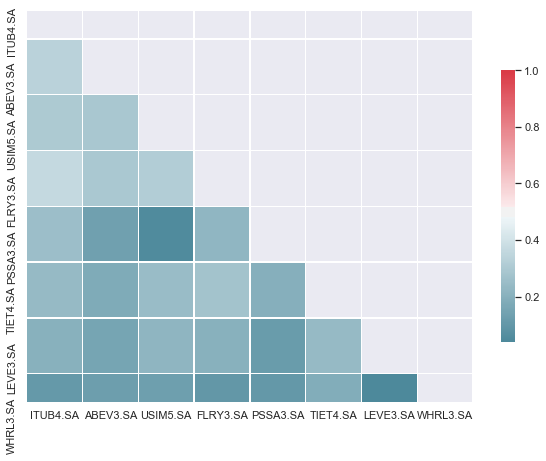

In [9]:
sns.set()

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlacao, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Tabela de correlação

In [5]:
correlacao

,ITUB4.SA,ABEV3.SA,USIM5.SA,FLRY3.SA,PSSA3.SA,TIET4.SA,LEVE3.SA,WHRL3.SA
ITUB4.SA,1.000000,0.336545,0.302919,0.369185,0.259220,0.238312,0.201108,0.109358
ABEV3.SA,0.336545,1.000000,0.292056,0.296078,0.133668,0.181457,0.158397,0.126465
USIM5.SA,0.302919,0.292056,1.000000,0.320482,0.052955,0.246664,0.220791,0.131401
FLRY3.SA,0.369185,0.296078,0.320482,1.000000,0.223718,0.277002,0.201509,0.100055
PSSA3.SA,0.259220,0.133668,0.052955,0.223718,1.000000,0.198848,0.119440,0.104209
TIET4.SA,0.238312,0.181457,0.246664,0.277002,0.198848,1.000000,0.239116,0.187567
LEVE3.SA,0.201108,0.158397,0.220791,0.201509,0.119440,0.239116,1.000000,0.039142
WHRL3.SA,0.109358,0.126465,0.131401,0.100055,0.104209,0.187567,0.039142,1.000000
